We will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train) #training images

60000

In [4]:
len(y_train) #training output of images i.e. digit

60000

In [5]:
len(X_test)

10000

In [8]:
len(y_test)

10000

In [ ]:
X_train

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_train[0]

In [12]:
X_train[0].shape

(28, 28)

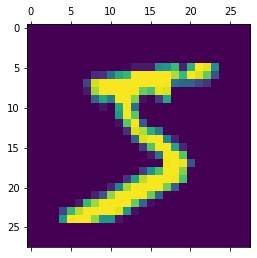

In [13]:
plt.matshow(X_train[0]) 

In [14]:
y_train[0]

5

In [ ]:
X_train[0]

In [15]:
X_train = X_train / 255 # values in array above are RBG values range from 0 - 255
X_test = X_test / 255   # we rescale values from 0 to 1

In [22]:
X_train.shape           # 60k-> no. of images |&| 28*28 is grid

(60000, 28, 28)

In [25]:
X_train.reshape(len(X_train), 28*28)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)    #from numpy we use reshape built-in funct
X_test_flattened = X_test.reshape(len(X_test), 28*28)       #28X28 = 784 neurons go in input layer

In [18]:
X_train_flattened.shape  

(60000, 784)

In [ ]:
X_train_flattened[0] #converts 2d array to 1d array

Very simple neural network with no hidden layers (only with input&output layers)

In [26]:
model = keras.Sequential([                                           #learn syntax
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') # output shape 10(neurons)-> 0 to 9 digits & input 784->28X28
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4747 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9254


In [27]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2657 - accuracy: 0.9262


[0.2656887173652649, 0.9261999726295471]

In [28]:
model.evaluate??  #Help -> explains

In [29]:
y_predicted = model.predict(X_test_flattened)          ##learn syntax
y_predicted[0]                                         #output me 10 values... See max is of 7

array([1.1840582e-02, 3.4333553e-07, 6.3019514e-02, 9.4170618e-01,
       1.8077791e-03, 9.3738437e-02, 3.3042495e-06, 9.9971330e-01,
       7.8840494e-02, 5.7338059e-01], dtype=float32)

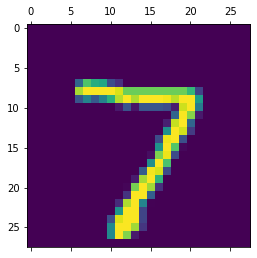

In [30]:
plt.matshow(X_test[0])

In [31]:
np.argmax(y_predicted[0])            #np.argmax finds a maximum element from an array and returns the index of it

7

In [32]:
#as above y_predicted is showing all values & we want integer values
y_predicted_labels = [np.argmax(i) for i in y_predicted] 

In [33]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [34]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    2,    0,    5,   10,    2,    3,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   5,    9,  924,   17,    8,    2,   13,   11,   39,    4],
       [   3,    0,   19,  926,    0,   19,    2,   10,   22,    9],
       [   1,    1,    3,    1,  911,    0,   13,    4,   10,   38],
       [   8,    2,    2,   44,   10,  756,   20,    7,   37,    6],
       [   8,    3,    4,    1,    7,    7,  923,    2,    3,    0],
       [   1,    6,   21,    8,    8,    1,    0,  950,    2,   31],
       [   5,    7,    5,   19,    9,   19,   11,   11,  880,    8],
       [  10,    7,    1,   10,   27,    4,    0,   19,    8,  923]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

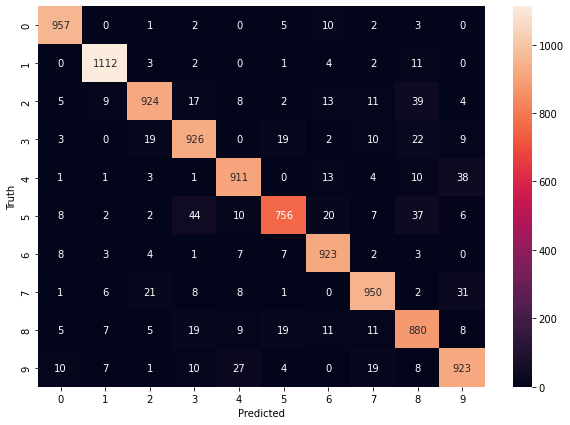

In [35]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')                                #all values except colored diagonal are errors

Using hidden layer

In [36]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),  # 100 -> is neurons in hidden layers
    keras.layers.Dense(10, activation='sigmoid')                     #can include more even layers for better result
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)                     # accuracy increases with hidden layers.. 

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2710 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1232 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0868 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0662 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0538 - accuracy: 0.9826


In [37]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9745


[0.08254478126764297, 0.9745000004768372]

Text(69.0, 0.5, 'Truth')

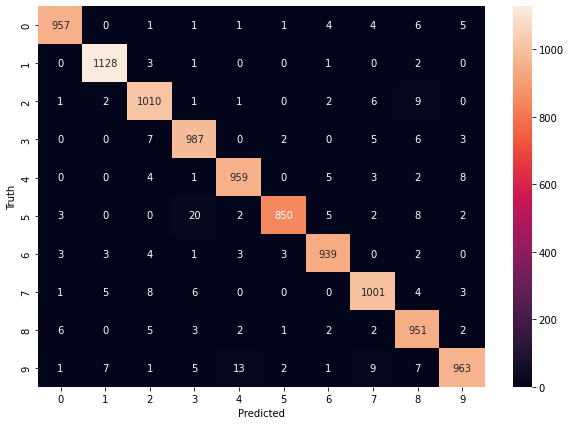

In [38]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
model = keras.Sequential([                                #Using Flatten layer so that we don't have to call .reshape on input dataset
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2687 - accuracy: 0.9246
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1179 - accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0821 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0610 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0487 - accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0393 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0316 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0260 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0228 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

In [40]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0922 - accuracy: 0.9759


[0.092228464782238, 0.9758999943733215]